In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import time
from pandas import ExcelWriter
from pandas import ExcelFile
%matplotlib inline

In [128]:
import geopandas as gpd
import folium
from shapely.geometry import Point

In [3]:
trash_df = pd.read_excel('data/Trash Hauler Report - Nov 2017 - Nov 2019 Final.xlsx', sheetname='Trash Hauler Report', header=1)
trash_df.head()

C:\Users\DP\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


In [46]:
trash_df1 = pd.read_csv('data/hubNashville__311__Service_Requests.csv')
trash_df1= trash_df1.rename(columns={"Request #": "Request Number"})
trash_df1.head()

,Request Number,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,hubNashville Community,NaN,NaN,...,False,NaN,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)"
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,hubNashville Community,NaN,NaN,...,False,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)"
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)"
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,Phone,NaN,NaN,...,False,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)"
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,hubNashville Community,NaN,NaN,...,False,105948.0,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)"


In [48]:
trash_pickup= pd.merge(trash_df,trash_df1, on=['Request Number'])


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District_x,State Plan X,...,State Issue,Parent Request,Closed When Created,Address,City,Council District_y,ZIP,Latitude,Longitude,Mapped Location
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,...,False,NaN,True,3817 Crouch Dr,NASHVILLE,2.0,37207,36.217300,-86.815400,"(36.2173, -86.8154)"
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,...,False,NaN,True,4028 Clarksville Pike,NASHVILLE,1.0,37218,36.213480,-86.838110,"(36.21348, -86.83811)"
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,...,False,NaN,True,6528 Thunderbird Dr,NASHVILLE,20.0,37209,36.142930,-86.885570,"(36.14293, -86.88557)"
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,...,False,NaN,True,2603 old matthews rd,NASHVILLE,2.0,37207,36.212660,-86.789180,"(36.21266, -86.78918)"
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,...,False,NaN,True,604 croley dr,NASHVILLE,20.0,37209,36.154870,-86.875000,"(36.15487, -86.875)"
5,25317,2017-11-01 09:08:00,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1.751660e+06,...,False,NaN,True,3602 floral dr,NASHVILLE,16.0,37211,36.098150,-86.733980,"(36.09815, -86.73398)"
6,25325,2017-11-01 09:29:00,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1.726301e+06,...,False,NaN,True,4721 Chalmers Dr,NASHVILLE,34.0,37215,36.080740,-86.819650,"(36.08074, -86.81965)"
7,25327,2017-11-01 09:32:00,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,...,False,NaN,True,1816 Jo Johnston Ave,NASHVILLE,21.0,37203,36.160340,-86.802990,"(36.16034, -86.80299)"
8,25330,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,...,False,NaN,True,4484 Lavergne Couchville Pike,ANTIOCH,33.0,37013,36.031730,-86.588370,"(36.03173, -86.58837)"
9,25331,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,...,False,NaN,True,1206 Ireland St,NASHVILLE,19.0,37208,36.167920,-86.797750,"(36.16792, -86.79775)"


In [49]:
trash_pickup.shape

(20226, 31)

In [51]:
trash_pickup.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District_x', 'State Plan X', 'State Plan Y', 'Status',
       'Request Type', 'Subrequest Type', 'Additional Subrequest Type',
       'Date / Time Opened', 'Date / Time Closed', 'Request Origin',
       'System of Origin ID', 'Contact Type', 'Preferred Language',
       'State Issue', 'Parent Request', 'Closed When Created', 'Address',
       'City', 'Council District_y', 'ZIP', 'Latitude', 'Longitude',
       'Mapped Location'],
      dtype='object')

In [52]:
trash_pickup= trash_pickup.rename(columns={"Request Number": 'request_ID',"Status":"status","Date Opened":"open_date","Request":"request", "Description": "description", "Incident Address": "incident_address", "Zip Code": "zip_code", "Trash Hauler": "hauler", "Trash Route": "route", "Council District_x": "district", "State Plan X": "plan_x", "State Plan Y": "plan_y", "Request Type": "request_type",
                                           "Subrequest Type": "subrequest_type", "Additional Subrequest Type": "addl_sub_type", "Date / Time Opened": "time_opened", "Date / Time Closed": "time_closed", "Request Origin": "request_origin", "System of Origin ID": "sys_of_origin_ID", "Contact Type": "contact_type", "Preferred Language": "preferred_lang", "State Issue": "state_issue", "Parent Request": "parent_request", "Closed When Created": "closed_when_created", "Address": "address", "City": "city", "Council District_y": "council_district", "ZIP": "zip", "Latitude": "lat", "Longitude": "long", "Mapped Location": "map_loc"})

In [53]:
trash_pickup.columns

Index(['request_ID', 'open_date', 'Request ', 'description',
       'incident_address', 'zip_code', 'hauler', 'route', 'district', 'plan_x',
       'plan_y', 'status', 'request_type', 'subrequest_type', 'addl_sub_type',
       'time_opened', 'time_closed', 'request_origin', 'sys_of_origin_ID',
       'contact_type', 'preferred_lang', 'state_issue', 'parent_request',
       'closed_when_created', 'address', 'city', 'council_district', 'zip',
       'lat', 'long', 'map_loc'],
      dtype='object')

In [54]:
trash_pickup['date'] = pd.to_datetime(trash_pickup['open_date'], errors='coerce').dt.floor('d')
trash_pickup

,request_ID,open_date,Request,description,incident_address,zip_code,hauler,route,district,plan_x,...,parent_request,closed_when_created,address,city,council_district,zip,lat,long,map_loc,date
0,25270,2017-11-01 07:09:00,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,...,NaN,True,3817 Crouch Dr,NASHVILLE,2.0,37207,36.217300,-86.815400,"(36.2173, -86.8154)",2017-11-01
1,25274,2017-11-01 07:42:00,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,...,NaN,True,4028 Clarksville Pike,NASHVILLE,1.0,37218,36.213480,-86.838110,"(36.21348, -86.83811)",2017-11-01
2,25276,2017-11-01 07:53:00,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,...,NaN,True,6528 Thunderbird Dr,NASHVILLE,20.0,37209,36.142930,-86.885570,"(36.14293, -86.88557)",2017-11-01
3,25307,2017-11-01 08:28:00,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,...,NaN,True,2603 old matthews rd,NASHVILLE,2.0,37207,36.212660,-86.789180,"(36.21266, -86.78918)",2017-11-01
4,25312,2017-11-01 08:55:00,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,...,NaN,True,604 croley dr,NASHVILLE,20.0,37209,36.154870,-86.875000,"(36.15487, -86.875)",2017-11-01
5,25317,2017-11-01 09:08:00,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1.751660e+06,...,NaN,True,3602 floral dr,NASHVILLE,16.0,37211,36.098150,-86.733980,"(36.09815, -86.73398)",2017-11-01
6,25325,2017-11-01 09:29:00,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1.726301e+06,...,NaN,True,4721 Chalmers Dr,NASHVILLE,34.0,37215,36.080740,-86.819650,"(36.08074, -86.81965)",2017-11-01
7,25327,2017-11-01 09:32:00,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,...,NaN,True,1816 Jo Johnston Ave,NASHVILLE,21.0,37203,36.160340,-86.802990,"(36.16034, -86.80299)",2017-11-01
8,25330,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,...,NaN,True,4484 Lavergne Couchville Pike,ANTIOCH,33.0,37013,36.031730,-86.588370,"(36.03173, -86.58837)",2017-11-01
9,25331,2017-11-01 09:45:00,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,...,NaN,True,1206 Ireland St,NASHVILLE,19.0,37208,36.167920,-86.797750,"(36.16792, -86.79775)",2017-11-01


In [58]:
trash_pickup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20226 entries, 0 to 20225
Data columns (total 32 columns):
request_ID             20226 non-null int64
open_date              20226 non-null datetime64[ns]
Request                20226 non-null object
description            20197 non-null object
incident_address       20217 non-null object
zip_code               20151 non-null float64
hauler                 19325 non-null object
route                  19279 non-null object
district               20177 non-null float64
plan_x                 20198 non-null float64
plan_y                 20198 non-null float64
status                 20226 non-null object
request_type           20226 non-null object
subrequest_type        20226 non-null object
addl_sub_type          20213 non-null object
time_opened            20226 non-null object
time_closed            20131 non-null object
request_origin         20226 non-null object
sys_of_origin_ID       27 non-null object
contact_type           1517 

In [77]:
zip_anly = trash_pickup.groupby('zip_code')
zip_avg = zip_anly.agg({'lat': np.mean,
                       'long': np.mean,
                        })
zip_avg.rename(columns = {'lat':'average_lat','long':'average_long'}, inplace = True)
zip_avg.reset_index(inplace=True)

In [81]:
zip_avg

,zip_code,average_lat,average_long
0,37013.0,36.061252,-86.640490
1,37027.0,36.038529,-86.761228
2,37076.0,36.196123,-86.590310
3,37086.0,36.027278,-86.589966
4,37115.0,36.260096,-86.714303
5,37138.0,36.219470,-86.655797
6,37189.0,36.243439,-86.823426
7,37201.0,36.164517,-86.777444
8,37203.0,36.147845,-86.788562
9,37204.0,36.111681,-86.786087


In [114]:
trash_pickup.zip.value_counts()

37013.0    2012
37211.0    1987
37205.0    1320
37115.0    1264
37209.0    1257
37215.0    1206
37207.0    1109
37206.0    1020
37214.0     916
37208.0     915
37218.0     857
37217.0     759
37216.0     737
37204.0     536
37212.0     518
37210.0     469
37203.0     344
37013       266
37211       261
37220.0     253
37215       198
37206       197
37207       191
37205       171
37209       154
37027.0     150
37218       126
37208       124
37216       104
37204        99
37214        88
37212        83
37210        81
37217        73
37189.0      56
37203        50
37221.0      40
37219.0      40
37220        36
37201.0      29
37027        18
37221         8
37201         6
37138.0       5
37076.0       5
37189         4
37115         2
37219         2
37086.0       2
37086         1
37213         1
37228.0       1
Name: zip, dtype: int64

In [161]:
zip_count = pd.DataFrame(trash_pickup.zip_code.value_counts().reset_index())
zip_count.columns = ['zip_code', 'count']
zip_count.zip_code= zip_count.zip_code.astype(int)
zip_count.columns = ['zip', 'count']
print(zip_count)

      zip  count
0   37013   2278
1   37211   2248
2   37205   1491
3   37209   1411
4   37215   1404
5   37207   1300
6   37115   1266
7   37206   1217
8   37208   1039
9   37214   1004
10  37218    983
11  37216    841
12  37217    832
13  37204    635
14  37212    601
15  37210    550
16  37203    394
17  37220    289
18  37027    168
19  37189     60
20  37221     48
21  37219     42
22  37201     35
23  37138      5
24  37076      5
25  37086      3
26  37213      1
27  37228      1


In [131]:
merged_zip_count_geo = pd.merge(zip_count, zip_avg, on='zip_code')
#merged_zip_count_geo['geometry'] = merged_zip_count_geo.apply(lambda x: Point((float(x.average_long), float(x.average_lat))), axis=1)
#merged_zip_count_geo.head()

,zip_code,count,average_lat,average_long,geometry
0,37013.0,2278,36.061252,-86.640490,POINT (-86.64048958018176 36.06125187111043)
1,37211.0,2248,36.075762,-86.724757,POINT (-86.72475688696409 36.07576244469892)
2,37205.0,1491,36.109518,-86.873865,POINT (-86.87386518064712 36.1095176686713)
3,37209.0,1411,36.153179,-86.851988,POINT (-86.8519879823511 36.15317946650589)
4,37215.0,1404,36.106251,-86.819357,POINT (-86.81935735749865 36.10625052566245)


In [137]:
merged_zip_count_geo.columns = ['zip', 'count', 'average_lat', 'average_long', 'geometry']
merged_zip_count_geo.zip= merged_zip_count_geo.zip.astype(int)
merged_zip_count_geo.head()

,zip,count,average_lat,average_long,geometry
0,37013,2278,36.061252,-86.640490,POINT (-86.64048958018176 36.06125187111043)
1,37211,2248,36.075762,-86.724757,POINT (-86.72475688696409 36.07576244469892)
2,37205,1491,36.109518,-86.873865,POINT (-86.87386518064712 36.1095176686713)
3,37209,1411,36.153179,-86.851988,POINT (-86.8519879823511 36.15317946650589)
4,37215,1404,36.106251,-86.819357,POINT (-86.81935735749865 36.10625052566245)


In [141]:
zip_geo = gpd.read_file('./data/Zip Codes.geojson')
zip_geo.crs
zip_geo.zip= zip_geo.zip.astype(int)

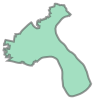

In [154]:
zip_geo.loc[0, "geometry"]

In [167]:
zip_counts = pd.merge(zip_count, zip_geo, on="zip")
zip_counts.head()

,zip,count,objectid,po_name,shape_stlength,shape_starea,geometry
0,37013,2278,34,ANTIOCH,349164.88029162859,1150567551.5894165,"(POLYGON ((-86.665173089672 36.091075932039, -..."
1,37211,2248,39,NASHVILLE,290587.58467925159,602215091.79736328,"(POLYGON ((-86.756956838904 36.131885734303, -..."
2,37205,1491,16,NASHVILLE,146801.80831498865,400978073.00933838,"(POLYGON ((-86.819065155403 36.133510392482, -..."
3,37209,1411,10,NASHVILLE,310224.91345860378,1001364029.2892456,"(POLYGON ((-86.975432896783 36.208771485895, -..."
4,37215,1404,38,NASHVILLE,158698.30754566603,424774478.15600586,"(POLYGON ((-86.814277402842 36.126181469653, -..."


In [168]:
merged_zip_count_geo = gpd.GeoDataFrame(zip_counts, crs= zip_geo.crs, geometry= zip_geo['geometry'])

In [157]:
zip_map = gpd.sjoin(merged_zip_count_geo, zip_geo, op = 'within')
zip_map.columns #delete

Index(['zip_left', 'count', 'average_lat', 'average_long', 'geometry',
       'index_right', 'zip_right', 'objectid', 'po_name', 'shape_stlength',
       'shape_starea'],
      dtype='object')

In [166]:
type(zip_counts)

pandas.core.frame.DataFrame

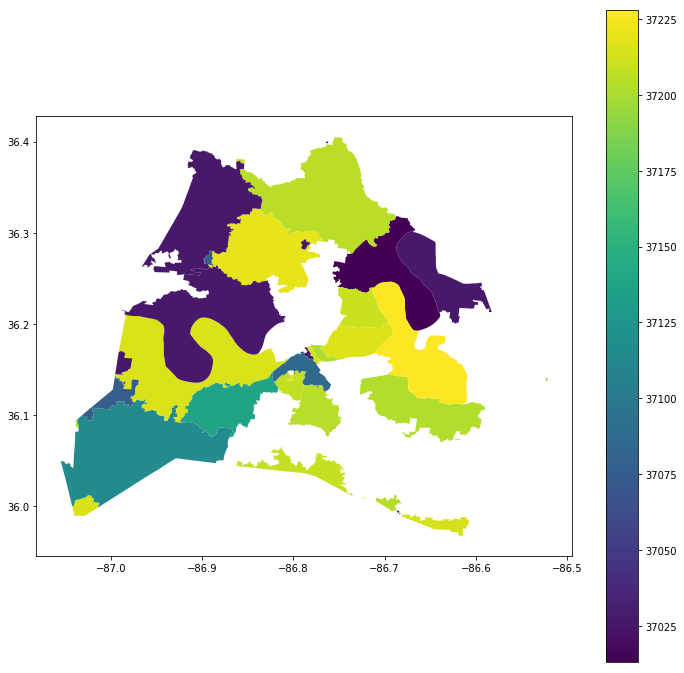

In [169]:
leg_kwds = {'title': 'Zipcode', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
merged_zip_count_geo.plot(column = 'zip', figsize=(12,12), legend = True,legend_kwds = leg_kwds)

plt.show()

In [89]:
def create_map(table, zips, mapped_feature, add_text = ''):
    m = folium.Map(location = [36.1627, 86.7816], zoom_start = 11)
    m.choropleth(
        zip_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        key_on = 'feature.properties.name',
        columns = [zips, mapped_feature],
        fill_color = 'RdYlGn',
        legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across Nashville')
    folium.LayerControl().add_to(m)

In [93]:
create_map(merged_zip_count_geo, 'zip_code', 'count', 'of Facilities')
create_map

<function __main__.create_map(table, zips, mapped_feature, add_text='')>

In [95]:
trash_pickup['hauler']= trash_pickup.hauler.str.upper()
trash_pickup['address']= trash_pickup.address.str.upper()

In [97]:
trash_pickup.address.value_counts()
trash_pickup['address_only'] = trash_pickup['incident_address'].astype('str').apply(lambda x:x.split(', ')[0])

110 GEORGE L DAVIS BLVD                                29
5135 HICKORY HOLLOW PKWY                               22
3710 N NATCHEZ CT                                      21
6007 OBRIEN AVE                                        20
1584 BELL RD                                           19
802 CRESCENT RD                                        19
1816 JO JOHNSTON AVE                                   18
607 ESTES RD                                           17
215 6TH AVE N                                          16
12546 OLD HICKORY BLVD                                 16
617 KINSEY BLVD                                        16
1537 HARDING PL                                        15
2813 DELAWARE AVE                                      15
3929 STEWARTS LN                                       15
14881 OLD HICKORY BLVD                                 15
15 HERMITAGE AVE                                       15
1601 S OBSERVATORY DR                                  15
755 RODNEY DR 

In [27]:
edu_df = trash_df[trash_df['Request Type'].isin(['Property Violations'])]
edu_df['Subrequest Type'].value_counts()

Junk and Debris                      4126
Tall Grass and Weeds                 3872
Residential Complaint                2734
Cars Parked on Lawn                  1596
Dilapidated Structures                902
Noise Violations                      660
Short Term Rental Complaint           380
Tree Concerns                         283
Tenant Complaint                      232
Fence Complaints                      217
Illegal Signs on Private Property     211
Graffiti on Private Property          203
Blocking the Right of Way              21
Rooming and Boarding                   13
Farm Animals                           10
Building Permits                        1
Zoning Request                          1
Abandoned Vehicles                      1
Obstruction of right of way             1
Signs                                   1
Short Term Rental Permit                1
Name: Subrequest Type, dtype: int64